In [3]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [4]:
dat=pd.read_excel("Data/RLMAT159.xlsx")
dat

,Wavelength (nm),A,B,B2,Bm,C,C2,Cm,D,D2,...,F,F2,Fm,G,G2,Gm,H,H2,Hm,I
0,436.059998,17.501556,18.599356,18.883934,18.741645,27.192190,20.451414,23.821802,17.271582,20.379269,...,21.234838,19.234076,20.234457,12.636235,26.135704,19.385970,16.188194,14.984716,15.586455,20.297724
1,436.959992,6.317105,8.231932,8.451962,8.341947,7.874425,8.155256,8.014841,6.285391,9.231087,...,10.099129,8.046389,9.072759,6.535158,11.536390,9.035774,9.631348,7.242352,8.436850,10.485497
2,438.029999,4.712414,5.766370,6.912728,6.339549,4.400719,5.735736,5.068228,4.986106,6.270949,...,8.117542,6.373403,7.245473,5.807134,9.781398,7.794266,8.231668,5.067959,6.649814,8.415561
3,438.929993,4.033108,5.871823,5.961953,5.916888,4.008291,5.269429,4.638860,4.148211,5.607706,...,7.704016,5.572203,6.638109,4.671384,9.050923,6.861154,7.390622,5.848423,6.619522,6.960873
4,440.000000,3.511232,4.364423,5.576251,4.970337,3.885929,5.032727,4.459328,3.706902,5.439076,...,7.725523,4.893964,6.309743,4.728350,9.363987,7.046168,6.875919,5.989841,6.432880,6.269108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,696.049988,0.104799,0.157052,0.081209,0.119130,0.092957,0.103481,0.098219,0.028633,0.005580,...,7.284165,1.110998,4.197582,7.879664,4.828999,6.354332,7.776159,8.014381,7.895270,7.448941
261,697.039978,0.081511,0.096878,0.160182,0.128530,0.110408,0.041011,0.075710,0.011585,0.051159,...,7.169671,1.117178,4.143424,7.227212,5.157356,6.192284,8.343122,7.897820,8.120471,7.413600
262,698.020019,0.160266,0.196092,0.125622,0.160857,0.076068,0.046226,0.061147,0.022934,0.055718,...,6.682249,1.128133,3.905191,6.311453,4.440708,5.376081,7.395588,8.030424,7.713006,6.884177
263,699.010010,0.103914,0.176662,-0.045677,0.065493,0.111779,0.104911,0.108345,0.039886,0.178202,...,6.783657,1.170251,3.976954,6.727924,4.449570,5.588747,6.572126,7.187504,6.879815,6.557683


In [15]:
x = list(dat['Wavelength (nm)'])
ys=[]
ys.append(list(dat['A']))
ys.append(list(dat['Bm']))
ys.append(list(dat['Cm']))
ys.append(list(dat['Dm']))
ys.append(list(dat['Em']))
ys.append(list(dat['Fm']))
ys.append(list(dat['Gm']))
ys.append(list(dat['Hm']))
ys.append(list(dat['I']))

Concs={'A':0,'Bm':0.01,'Cm':0.02,'Dm':0.03,'Em':0.04,'Fm':0.06,'Gm':0.08,'Hm':0.1,'I':0.2}

Letters=['A','Bm','Cm','Dm','Em','Fm','Gm','Hm','I']

In [16]:
bs=[]
for i in range(0,len(ys)):
    bs.append(np.max(ys[i]))



In [7]:

InsetX

NameError: name 'InsetX' is not defined

In [8]:
#a1 = mpatches.Patch(facecolor='#ff0000', label='$\mathregular{Hg^{+}}$', linewidth = 0.5, edgecolor = 'black')
#a2 = mpatches.Patch(facecolor='#ff8000', label = '$\mathregular{K^{+}}$', linewidth = 0.5, edgecolor = 'black')
#a3 = mpatches.Patch(facecolor='#FFC600', label='$\mathregular{Cs^{+2}}$', linewidth = 0.5, edgecolor = 'black')


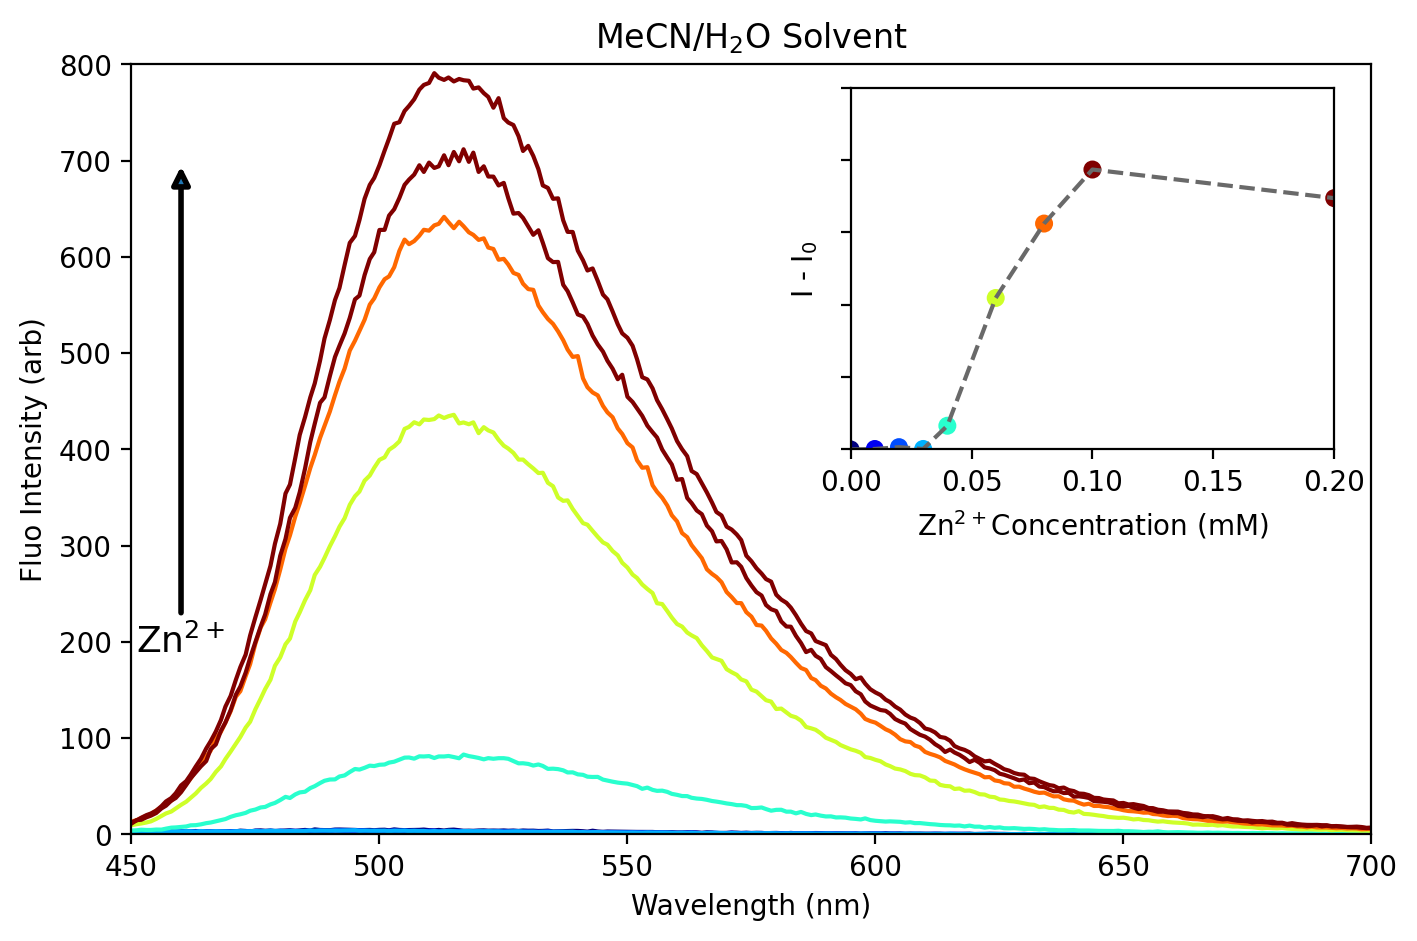

In [20]:
InsetX=[]
InsetY=[]
InsetCols=[]

plt.figure(figsize=(8,5),dpi=200)
for i in range(0,len(ys)):
    if(Concs[Letters[i]]<1.6):
        col = plt.cm.jet(Concs[Letters[i]]/0.1)
        plt.plot(x,ys[i],color=col)
        InsetX.append(Concs[Letters[i]])
        InsetY.append(bs[i]-min(bs))
        InsetCols.append(col)
                        

plt.xlim(450,700)
plt.ylim(0,800)
pylab.xlabel("Wavelength (nm)")
pylab.ylabel("Fluo Intensity (arb)")

ax = plt.gcf().gca()
ax.annotate('$\mathregular{Zn^{2+}}$', 
            xy=(460, 700),
            xycoords='data',
            xytext=(460, 200), 
            va='center',
            ha='center',
            fontsize=13,
            arrowprops={'arrowstyle': '-|>', 'lw': 2})
axins = ax.inset_axes(
    [0.58, 0.5, 0.39, 0.47],
    xlim=(0, 0.2), ylim=(0, 1e3),  yticklabels=[])
#axins.loglog()
#axins2 = inset_axes(ax, width="40%", height="50%", loc=1)
axins.scatter(InsetX,InsetY,c=InsetCols,s=30)
axins.plot(np.sort(InsetX),np.array(InsetY)[np.argsort(InsetX)],'--',color='dimgrey')
axins.set_xlabel("$\mathregular{Zn^{2+}}$Concentration (mM)")
axins.set_ylabel("I - $\mathregular{I_{0}}$ ")
plt.title("MeCN/H$_2$O Solvent")
plt.show()